In [1]:
import os
import sys
import tensorflow                             as tf
import numpy                                  as np
import pandas                                 as pd
import matplotlib.pyplot                      as plt

In [2]:
WORKSPACE_PATH    = os.getenv('WORKSPACE_PATH')  
TVec              = np.array([1500.0, 5000.0, 10000.0, 15000.0, 20000.0])
NPerGroup         = 3

# Molecule          = 'O2'
# PathToDiatPot     = WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/O2/UMN/FromUMN_Sorted.inp'
# PathTo3AtomsFldr  = WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/AmalInel_Sampled/'
# PathToGroups      = WORKSPACE_PATH + '/Air_Database/Run_0D/database/grouping/O3_UMN/O2/LevelsMap_InelAmal45.csv'

Molecule          = 'N2'
PathToDiatPot     = WORKSPACE_PATH + '/CoarseAIR/coarseair/dtb/Molecules/N2/LeRoy/MyLeroy_FromRobyn.inp'
PathTo3AtomsFldr  = WORKSPACE_PATH + '/Air_Database/Run_0D/database/levels/AmalInel_Sampled/'
PathToGroups      = WORKSPACE_PATH + '/Air_Database/Run_0D/database/grouping/N4_NASA/N2/LevelsMap_InelAmal61.csv'

In [3]:
LevelToGroupDF    = pd.read_csv(PathToGroups)
LevelToGroup      = LevelToGroupDF.to_numpy(int)[:,1] - 1
NGroup            = np.amax(LevelToGroup) + 1

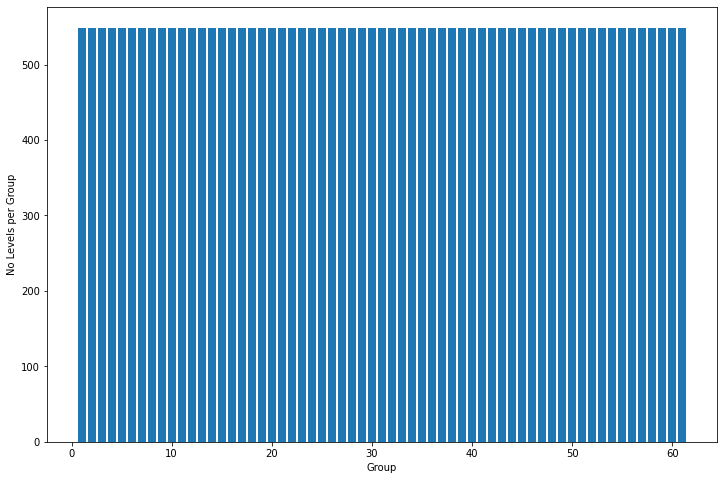

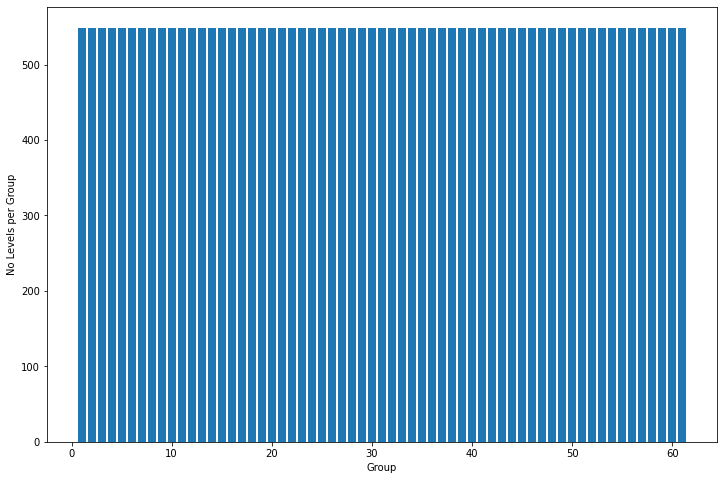

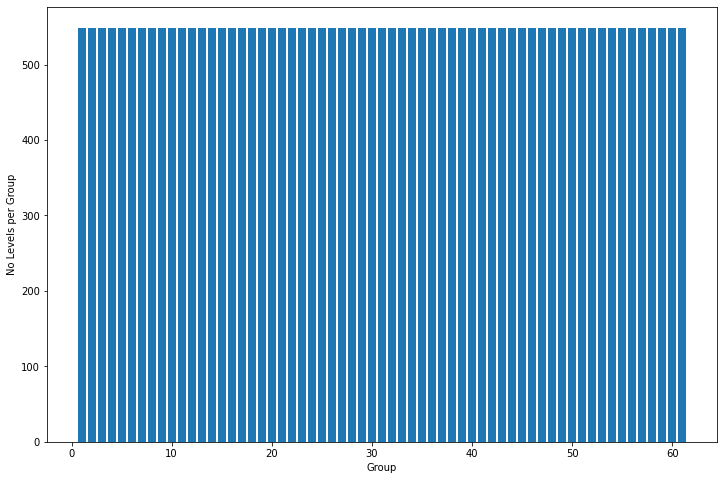

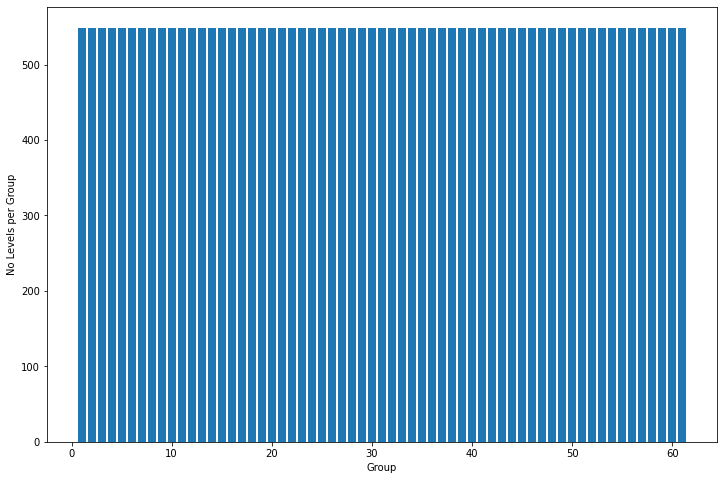

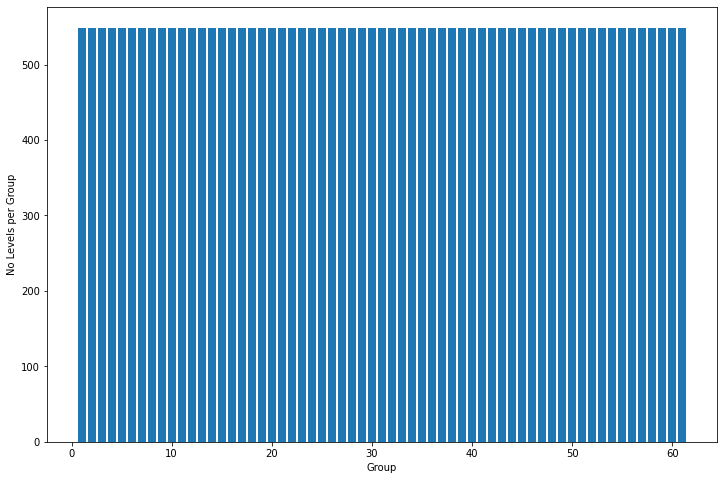

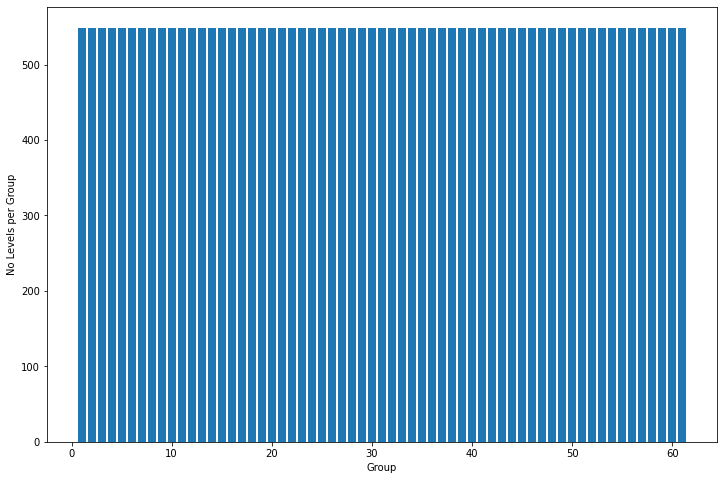

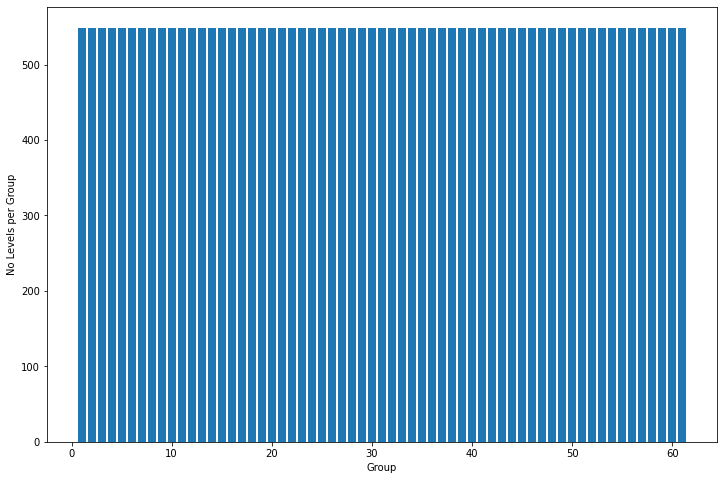

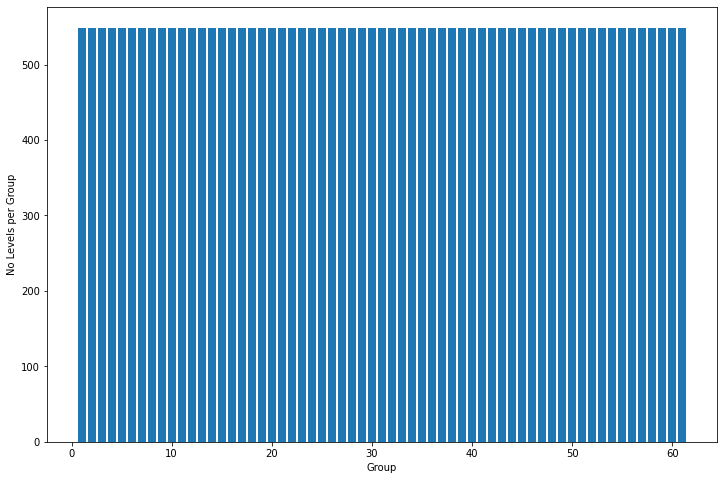

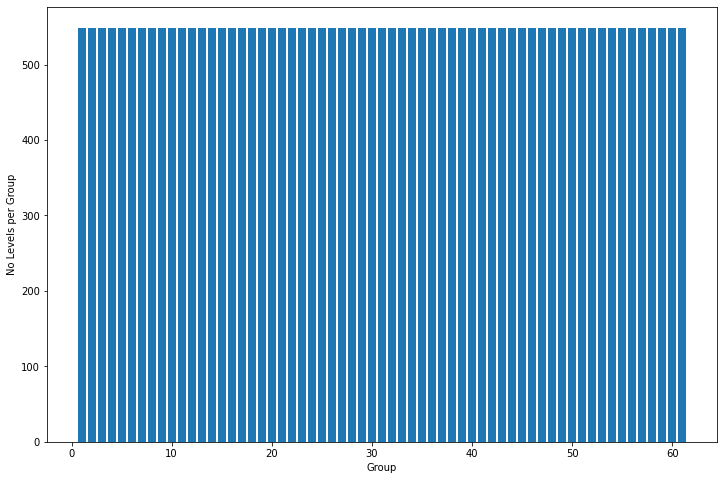

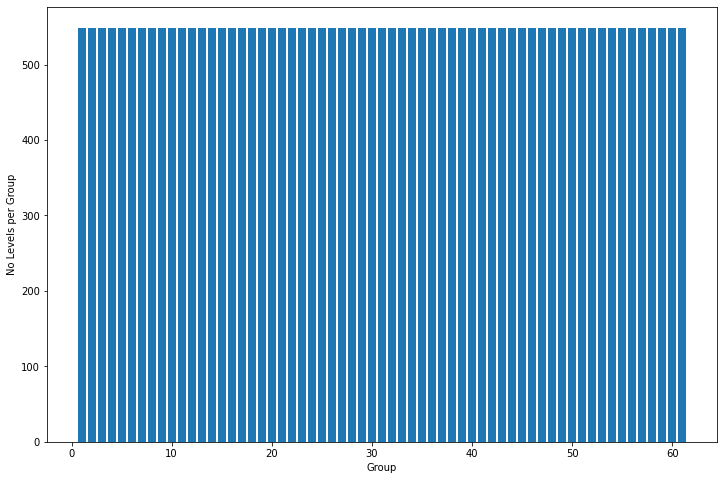

In [4]:
for T in TVec:
    #Sampled  = pd.read_csv(PathTo3AtomsFldr+str(Molecule)+'_Sampled_Inel_'+str(int(T))+'K.csv').to_numpy(int)[:,0] - 1
    Sampled  = pd.read_csv(PathTo3AtomsFldr+str(Molecule)+'_Sampled_'+str(int(T))+'K.csv').to_numpy(int)[:,0] - 1
    Sampled1 = []
    Sampled2 = []
    
    LevelsPerGroup = np.zeros(NGroup, dtype=int)
    for iLevel in Sampled:
        LevelsPerGroup[LevelToGroup[iLevel]] += 1  
    
        for iGroup in range(1,NGroup+1):
            Sampled1 += [iLevel, iLevel, iLevel]
            Sampled2 += LevelToGroupDF['#Idx'][LevelToGroupDF['Group'] == iGroup].sample(n=NPerGroup).to_list()
    
    Sampled1 = np.array(Sampled1, dtype=int)
    Sampled2 = np.array(Sampled2, dtype=int) - 1

    LevelsPerGroup1 = np.zeros(NGroup, dtype=int)
    for jLevel in Sampled1:
        LevelsPerGroup1[LevelToGroup[jLevel]] += 1 

    LevelsPerGroup2 = np.zeros(NGroup, dtype=int)
    for jLevel in Sampled2:
        LevelsPerGroup2[LevelToGroup[jLevel]] += 1  

    plt.figure(figsize=(12,8))
    plt.bar(np.arange(NGroup)+1, LevelsPerGroup1)
    plt.xlabel('Group')
    plt.ylabel('No Levels per Group')
    
    plt.figure(figsize=(12,8))
    plt.bar(np.arange(NGroup)+1, LevelsPerGroup2)
    plt.xlabel('Group')
    plt.ylabel('No Levels per Group')
    
    DF      = pd.DataFrame()
    DF['i'] = Sampled1
    DF['j'] = Sampled2
    DF.to_csv('./'+Molecule+'SampledLevels_Amals'+str(NPerGroup)+'_'+str(int(T))+'.csv', index=False)